<a href="https://colab.research.google.com/github/CuongLeManh02/Learning-content/blob/main/identify_10_foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Database/Foods/

/content/drive/MyDrive/Colab Notebooks/Database/Foods


In [5]:
train_img=('/content/drive/MyDrive/Colab Notebooks/Database/Foods/Train')

In [4]:
valid_img=('/content/drive/MyDrive/Colab Notebooks/Database/Foods/Val')

In [7]:
train_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
valid_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [8]:
train_food= train_dg.flow_from_directory(train_img,target_size=(200,200),class_mode='categorical')
valid_food= valid_dg.flow_from_directory(valid_img,target_size=(200,200),class_mode='categorical')

Found 301 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [10]:
x_train,y_train=next(train_food)

In [11]:
x_train.shape


(32, 200, 200, 3)

In [12]:
y_train.shape


(32, 10)

In [36]:
label=['Bánh mì','Bánh trưng','Bánh xèo','bắp xào','Cơm chiên','Gà chiên nước mắm','Đậu hũ','Gỏi cuốn','Cua hấp','Tôm Nướng']

In [14]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [18]:
model.compile(optimizer='Adam',loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_food,epochs=500,batch_size=128,verbose=1, validation_data=valid_food, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
10/10 [==============================] - 161s 18s/step - loss: 2.5571 - accuracy: 0.1063 - val_loss: 2.2530 - val_accuracy: 0.1500
Epoch 2/500
10/10 [==============================] - 4s 454ms/step - loss: 2.0774 - accuracy: 0.2359 - val_loss: 1.8601 - val_accuracy: 0.3800
Epoch 3/500
10/10 [==============================] - 4s 450ms/step - loss: 1.6652 - accuracy: 0.3821 - val_loss: 1.9448 - val_accuracy: 0.3500
Epoch 4/500
10/10 [==============================] - 4s 442ms/step - loss: 1.5667 - accuracy: 0.4219 - val_loss: 1.6126 - val_accuracy: 0.4100
Epoch 5/500
10/10 [==============================] - 4s 473ms/step - loss: 1.2718 - accuracy: 0.5183 - val_loss: 1.5650 - val_accuracy: 0.4400
Epoch 6/500
10/10 [==============================] - 5s 538ms/step - loss: 1.0292 - accuracy: 0.6213 - val_loss: 1.5746 - val_accuracy: 0.5400
Epoch 7/500
10/10 [==============================] - 4s 440ms/step - loss: 0.8232 - accuracy: 0.7010 - val_loss: 1.6169 - val_accuracy: 0.4900

In [19]:
model.save('identify 10 foods.h5')


In [20]:
metric = model.evaluate(x_train,y_train,verbose=2)
print('Loss:',metric[0])
print('Accuracy:',metric[1])

1/1 - 0s - loss: 0.0236 - accuracy: 1.0000 - 50ms/epoch - 50ms/step
Loss: 0.023561906069517136
Accuracy: 1.0


1/1 [==============================] - 0s 16ms/step
[[9.9904519e-01 1.0825926e-05 1.6770593e-05 3.5654983e-04 4.5467385e-08
  2.3929533e-06 3.3020689e-05 7.9152287e-08 5.0673657e-04 2.8339231e-05]]
1/1 [==============================] - 0s 15ms/step
This is: Bánh mì


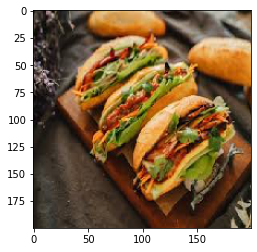

In [33]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Foods/Test/bánh mì42.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 16ms/step
[[3.01357619e-14 1.12333076e-13 1.91435713e-04 8.38882329e-07
  9.99807775e-01 1.16230387e-23 2.06173410e-15 3.36329136e-14
  8.27527206e-23 1.65743794e-10]]
1/1 [==============================] - 0s 15ms/step
This is: Cơm chiên


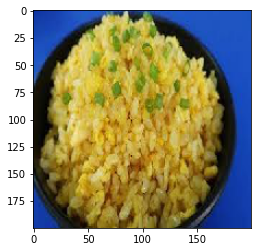

In [32]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Foods/Test/com chien41.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 17ms/step
[[4.3875756e-04 4.5088550e-06 1.0778368e-09 2.2198199e-06 1.1863671e-09
  1.1736700e-05 1.6713348e-05 6.0007771e-08 9.9952137e-01 4.6229202e-06]]
1/1 [==============================] - 0s 17ms/step
This is: Cua hấp


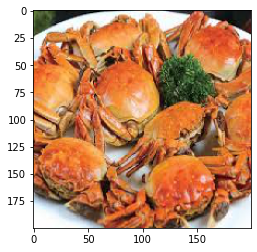

In [31]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Foods/Test/cua hấp44.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 15ms/step
[[2.0127837e-04 6.6709531e-06 1.2580914e-15 4.3816001e-07 9.7650829e-15
  4.7250021e-01 4.5274922e-01 5.1092758e-07 7.4531868e-02 9.7220864e-06]]
1/1 [==============================] - 0s 17ms/step
This is: Gà chiên nước mắm


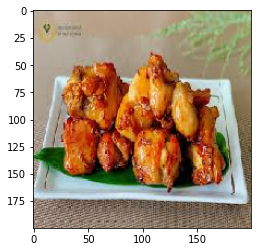

In [37]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Foods/Test/ga chien nuoc mam43.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])